In [1]:
import numpy as np
import pickle
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from utils import *
from ml_function import *
from distribution_comparison import *



In [2]:
#original =pd.read_pickle('/mnt/synthetic_data/data/processed/0_preprocess/D3.pkl')
original = pd.read_csv('/home/dogu86/young_age_colon_cancer/final_src/modified_D0.csv')
original.drop(['PT_SBST_NO','Unnamed: 0'],axis = 1, inplace=True)
real = original
real = real.rename(columns={'DEAD_NFRM_DEAD':'DEAD'})
#real = real.drop('DEAD_DIFF',axis=1)
#real = real.drop('BSPT_DEAD_YMD',axis=1)
#real = real.drop('CENTER_LAST_VST_YMD',axis=1)
#real = real.drop('DEAD.1',axis=1)
real = real.drop('DEAD_DIFF',axis=1)
#real = real.drop('5YR_DEAD',axis=1)


real = real.replace(-1,0)
real.replace(np.NaN,0, inplace=True)


In [3]:
syn_data = []

for epsilon in [0.1,1,10,100,1000,10000]:
    temp = pd.read_csv(f'/home/dogu86/young_age_colon_cancer/final_data/synthetic_decoded/Synthetic_data_epsilon{epsilon}.csv')
    temp = temp.rename(columns={'DEAD_NFRM_DEAD':'DEAD'})
    temp = temp.drop('DEAD_DIFF', axis=1)
    temp.drop(['Unnamed: 0','PT_SBST_NO'],axis=1,inplace=True)
    temp.replace(np.NaN,0,inplace=True)
    syn_data.append(temp.astype(float))
    

Processing ...DecisionTree
0.8987543765781494
0.8975012437460692
0.898749683196756
0.9012512554795228
0.9012418687167357
0.8974965503646758
0.8999934292660491
0.9012512554795228
0.9062450132822694
0.9049918804501892
0.9037528277622896
0.9075028394957432
0.9174809683384492
0.9012324819539486
0.9050012672129762
0.9099997183971164
0.9062497066636629
0.8999934292660491
0.9024996949302094
0.9024996949302094
0.902504388311603
0.9049918804501891
0.9037575211436831
0.9012559488609163
0 [0.47958426132145504, 0.9215406562054208, 0.5]
0.8987543765781494
0.8999981226474426
0.8974965503646758
0.9024903081674224
0.9024996949302094
0.8975012437460692
0.9037481343808961
0.8999981226474425
0.9012418687167357
0.9050012672129762
0.9050059605943698
0.9062450132822694
0.9099997183971164
0.9062497066636629
0.8962528042953827
0.9100044117785099
0.9074981461143495
0.8987543765781494
0.9062450132822694
0.9087418921836427
0.9062544000450564
0.9124965972984898
0.9087465855650362
0.9062544000450566
1 [0.261414017

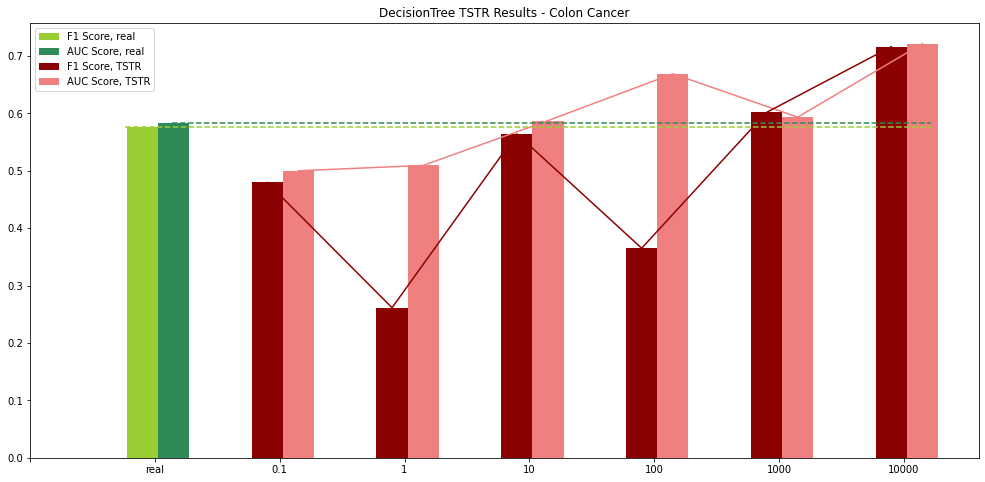

In [4]:
models = [DecisionTreeClassifier(),
          #KNeighborsClassifier(),
          #RandomForestClassifier(n_jobs=-1)
          #XGBClassifier()]
            ]
tstr_scores = []
real_scores = []
for i, model in enumerate(models):
    print(f'Processing ...'+ str(model).split('C')[0])
    result = output(real, syn_data, model)
    
    tstr = result[0]
    real_score = result[1]
    
    tstr_scores.append(tstr)
    real_scores.append(real_score)
    print(f'Done {i+1} / {len(models)}')
    

In [32]:
test = pd.concat([real[real['DEAD']==1].sample(30),real[real['DEAD']==0].sample(270)])

In [33]:
train = real.drop(test.index)
times5=pd.DataFrame()
for _ in range(5):
    times5 = pd.concat([times5,train.copy()])

In [36]:
model = RandomForestClassifier()
model.fit(train.drop('DEAD',axis=1),train['DEAD'])
pred = model.predict(test.drop('DEAD',axis=1))

f1 = f1_score(test['DEAD'],pred, average='macro')
acc = accuracy_score(test['DEAD'],pred)
roc = roc_auc_score(test['DEAD'],pred)

In [40]:
[f1,acc,roc]

[0.7345234889000039, 0.9233333333333333, 0.6907407407407407]

In [30]:
data = pd.read_csv('/home/dogu86/young_age_colon_cancer/final_src/modified_syn_0.csv')
data

,Unnamed: 0,PT_SBST_NO,BSPT_SEX_CD,BSPT_IDGN_AGE,BSPT_FRST_DIAG_NM,BSPT_STAG_CLSF_CD,BSPT_STAG_VL,RLPS,RLPS DIFF,DEAD,...,REGN_CSTR_REGN_NM_7,REGN_CSTR_PRPS_NT_7,REGN_CASB_CSTR_PRPS_NM_7,REGN_TIME_DIFF_7,REGN_CSTR_CYCL_VL_END_7,REGN_CSTR_REGN_NM_8,REGN_CSTR_PRPS_NT_8,REGN_CASB_CSTR_PRPS_NM_8,REGN_TIME_DIFF_8,REGN_CSTR_CYCL_VL_END_8
0,0,tizhsohlxw0,0,9,2,0,2.0,0,0.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
1,1,ixeavuaruf1,0,8,0,1,2.0,0,0.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
2,2,hfxfumjupg2,0,8,1,1,4.0,1,14.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
3,3,rvozpqdmyx3,0,9,2,1,3.0,0,0.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
4,4,ifqlrymxka4,1,9,2,1,1.0,0,0.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1315,klhgxxaaiw1315,1,9,0,1,2.0,0,0.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
1316,1316,dgoseqtitt1316,0,8,0,1,4.0,0,0.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
1317,1317,entanirsso1317,1,7,0,1,3.0,0,0.0,0,...,2,-1,1,-1,-1,1,-1,1,-1,-1
1318,1318,pwpxbvfypx1318,1,8,0,1,3.0,1,20.0,1,...,2,-1,1,-1,-1,1,-1,1,-1,-1


In [3]:
times5 = real
for _ in range(4):
    times5 = pd.concat([times5,real.copy()])

In [16]:
times5

,BSPT_SEX_CD,BSPT_IDGN_AGE,BSPT_FRST_DIAG_NM,BSPT_STAG_CLSF_CD,BSPT_STAG_VL,RLPS,RLPS DIFF,DEAD,OVR_SURV,BPTH_SITE_CONT,...,REGN_CSTR_REGN_NM_7,REGN_CSTR_PRPS_NT_7,REGN_CASB_CSTR_PRPS_NM_7,REGN_TIME_DIFF_7,REGN_CSTR_CYCL_VL_END_7,REGN_CSTR_REGN_NM_8,REGN_CSTR_PRPS_NT_8,REGN_CASB_CSTR_PRPS_NM_8,REGN_TIME_DIFF_8,REGN_CSTR_CYCL_VL_END_8
0,1,8,0,3,0.0,0,0.0,0,33.0,33,...,2,0,1,0,0,1,0,1,0,0
1,0,7,0,1,3.0,1,15.0,1,9.0,5,...,2,0,1,0,0,1,0,1,0,0
2,0,8,0,3,0.0,0,0.0,0,1.0,5,...,2,0,1,0,0,1,0,1,0,0
3,1,10,0,1,1.0,0,0.0,0,51.0,5,...,2,0,1,0,0,1,0,1,0,0
4,1,8,0,1,3.0,0,0.0,0,44.0,2,...,2,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0,8,1,1,2.0,0,0.0,0,3.0,33,...,2,0,1,0,0,1,0,1,0,0
1497,1,10,2,1,3.0,0,0.0,0,3.0,33,...,2,0,1,0,0,1,0,1,0,0
1498,0,9,0,1,3.0,0,0.0,0,3.0,33,...,2,0,1,0,0,1,0,1,0,0
1499,0,10,0,0,4.0,0,0.0,0,3.0,5,...,2,0,1,0,0,1,0,1,0,0


In [7]:
data = pd.read_csv('/home/dogu86/young_age_colon_cancer/final_data/synthetic_decoded/Synthetic_data_epsilon8000.csv', encoding = 'cp949')
data = data.rename(columns={'DEAD_NFRM_DEAD':'DEAD'})
data.drop(['Unnamed: 0','PT_SBST_NO'],axis=1,inplace=True)
data = data.drop('DEAD_DIFF',axis=1)
data.replace(np.NaN,0,inplace=True)

#data = syn_data[5]

def get_train(data):

    new_d0_dt = ml_train(data, DecisionTreeClassifier(), 1, save = False, importance = False)
    new_d0_rf = ml_train(data, RandomForestClassifier(max_depth=10), 1, save = False, importance = True)
    new_d0_knn = ml_train(data, KNeighborsClassifier(), 1, save = False, importance = False)

    #whole data

    return pd.DataFrame([new_d0_dt[1],new_d0_rf[1],new_d0_knn[1]],columns = ['F1','Acc','ROC','Loss'], 
                index = ['DecisionTree','RandomForest','KNN'])
    
a = get_train(data)
a

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [8]:
data = times5
#data = syn_data[5]

def get_train(data):

    new_d0_dt = ml_train(data, real, DecisionTreeClassifier())
    new_d0_rf =  ml_train(data, real, RandomForestClassifier())
    #new_d0_knn =  get_best_model(data, real, KNeighborsClassifier())

    #whole data

    return pd.DataFrame([new_d0_dt[1],new_d0_rf[1]],columns = ['F1','Acc','ROC'], 
                index = ['DecisionTree','RandomForest'])
    
a = get_train(times5)
a

TypeError: estimator should be an estimator implementing 'fit' method,       BSPT_SEX_CD  BSPT_IDGN_AGE  BSPT_FRST_DIAG_NM  BSPT_STAG_CLSF_CD  \
0               1              8                  0                  3   
1               0              7                  0                  1   
2               0              8                  0                  3   
3               1             10                  0                  1   
4               1              8                  0                  1   
...           ...            ...                ...                ...   
1496            0              8                  1                  1   
1497            1             10                  2                  1   
1498            0              9                  0                  1   
1499            0             10                  0                  0   
1500            1              8                  0                  1   

      BSPT_STAG_VL  RLPS  RLPS DIFF  DEAD  OVR_SURV  BPTH_SITE_CONT  ...  \
0              0.0     0        0.0     0      33.0              33  ...   
1              3.0     1       15.0     1       9.0               5  ...   
2              0.0     0        0.0     0       1.0               5  ...   
3              1.0     0        0.0     0      51.0               5  ...   
4              3.0     0        0.0     0      44.0               2  ...   
...            ...   ...        ...   ...       ...             ...  ...   
1496           2.0     0        0.0     0       3.0              33  ...   
1497           3.0     0        0.0     0       3.0              33  ...   
1498           3.0     0        0.0     0       3.0              33  ...   
1499           4.0     0        0.0     0       3.0               5  ...   
1500           3.0     0        0.0     0       3.0               5  ...   

      REGN_CSTR_REGN_NM_7  REGN_CSTR_PRPS_NT_7  REGN_CASB_CSTR_PRPS_NM_7  \
0                       2                    0                         1   
1                       2                    0                         1   
2                       2                    0                         1   
3                       2                    0                         1   
4                       2                    0                         1   
...                   ...                  ...                       ...   
1496                    2                    0                         1   
1497                    2                    0                         1   
1498                    2                    0                         1   
1499                    2                    0                         1   
1500                    2                    0                         1   

      REGN_TIME_DIFF_7  REGN_CSTR_CYCL_VL_END_7  REGN_CSTR_REGN_NM_8  \
0                    0                        0                    1   
1                    0                        0                    1   
2                    0                        0                    1   
3                    0                        0                    1   
4                    0                        0                    1   
...                ...                      ...                  ...   
1496                 0                        0                    1   
1497                 0                        0                    1   
1498                 0                        0                    1   
1499                 0                        0                    1   
1500                 0                        0                    1   

      REGN_CSTR_PRPS_NT_8  REGN_CASB_CSTR_PRPS_NM_8  REGN_TIME_DIFF_8  \
0                       0                         1                 0   
1                       0                         1                 0   
2                       0                         1                 0   
3                       0                         1                 0   
4                       0                         1                 0   
...                   ...                       ...               ...   
1496                    0                         1                 0   
1497                    0                         1                 0   
1498                    0                         1                 0   
1499                    0                         1                 0   
1500                    0                         1                 0   

      REGN_CSTR_CYCL_VL_END_8  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
1496                        0  
1497                        0  
1498                        0  
1499                        0  
1500                        0  

[1501 rows x 75 columns] was passed

,BSPT_SEX_CD,BSPT_IDGN_AGE,BSPT_FRST_DIAG_NM,BSPT_STAG_CLSF_CD,BSPT_STAG_VL,RLPS,RLPS DIFF,DEAD,OVR_SURV,BPTH_SITE_CONT,...,REGN_CSTR_REGN_NM_7,REGN_CSTR_PRPS_NT_7,REGN_CASB_CSTR_PRPS_NM_7,REGN_TIME_DIFF_7,REGN_CSTR_CYCL_VL_END_7,REGN_CSTR_REGN_NM_8,REGN_CSTR_PRPS_NT_8,REGN_CASB_CSTR_PRPS_NM_8,REGN_TIME_DIFF_8,REGN_CSTR_CYCL_VL_END_8
0,0.0,8.0,0.0,0.0,3.0,0.0,9.0,1.0,25.0,25.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,8.0,1.0,1.0,1.0,1.0,15.0,1.0,13.0,18.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,8.0,0.0,0.0,1.0,0.0,27.0,1.0,29.0,31.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,5.0,0.0,2.0,3.0,0.0,36.0,0.0,31.0,23.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,7.0,1.0,0.0,4.0,1.0,77.0,0.0,39.0,23.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,1.0,9.0,2.0,2.0,2.0,1.0,77.0,0.0,16.0,14.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7501,1.0,8.0,1.0,1.0,4.0,1.0,35.0,1.0,8.0,28.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7502,0.0,3.0,2.0,2.0,0.0,1.0,7.0,1.0,38.0,22.0,...,1.0,7.0,0.0,1.0,2.0,0.0,8.0,0.0,2.0,4.0
7503,0.0,6.0,0.0,2.0,4.0,1.0,11.0,1.0,15.0,31.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:
import scienceplots

RuntimeError: Failed to process string with tex because dvipng could not be found

<Figure size 252x189 with 1 Axes>

Text(0.5, 1.0, 'Relapse, epsilon 10000')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


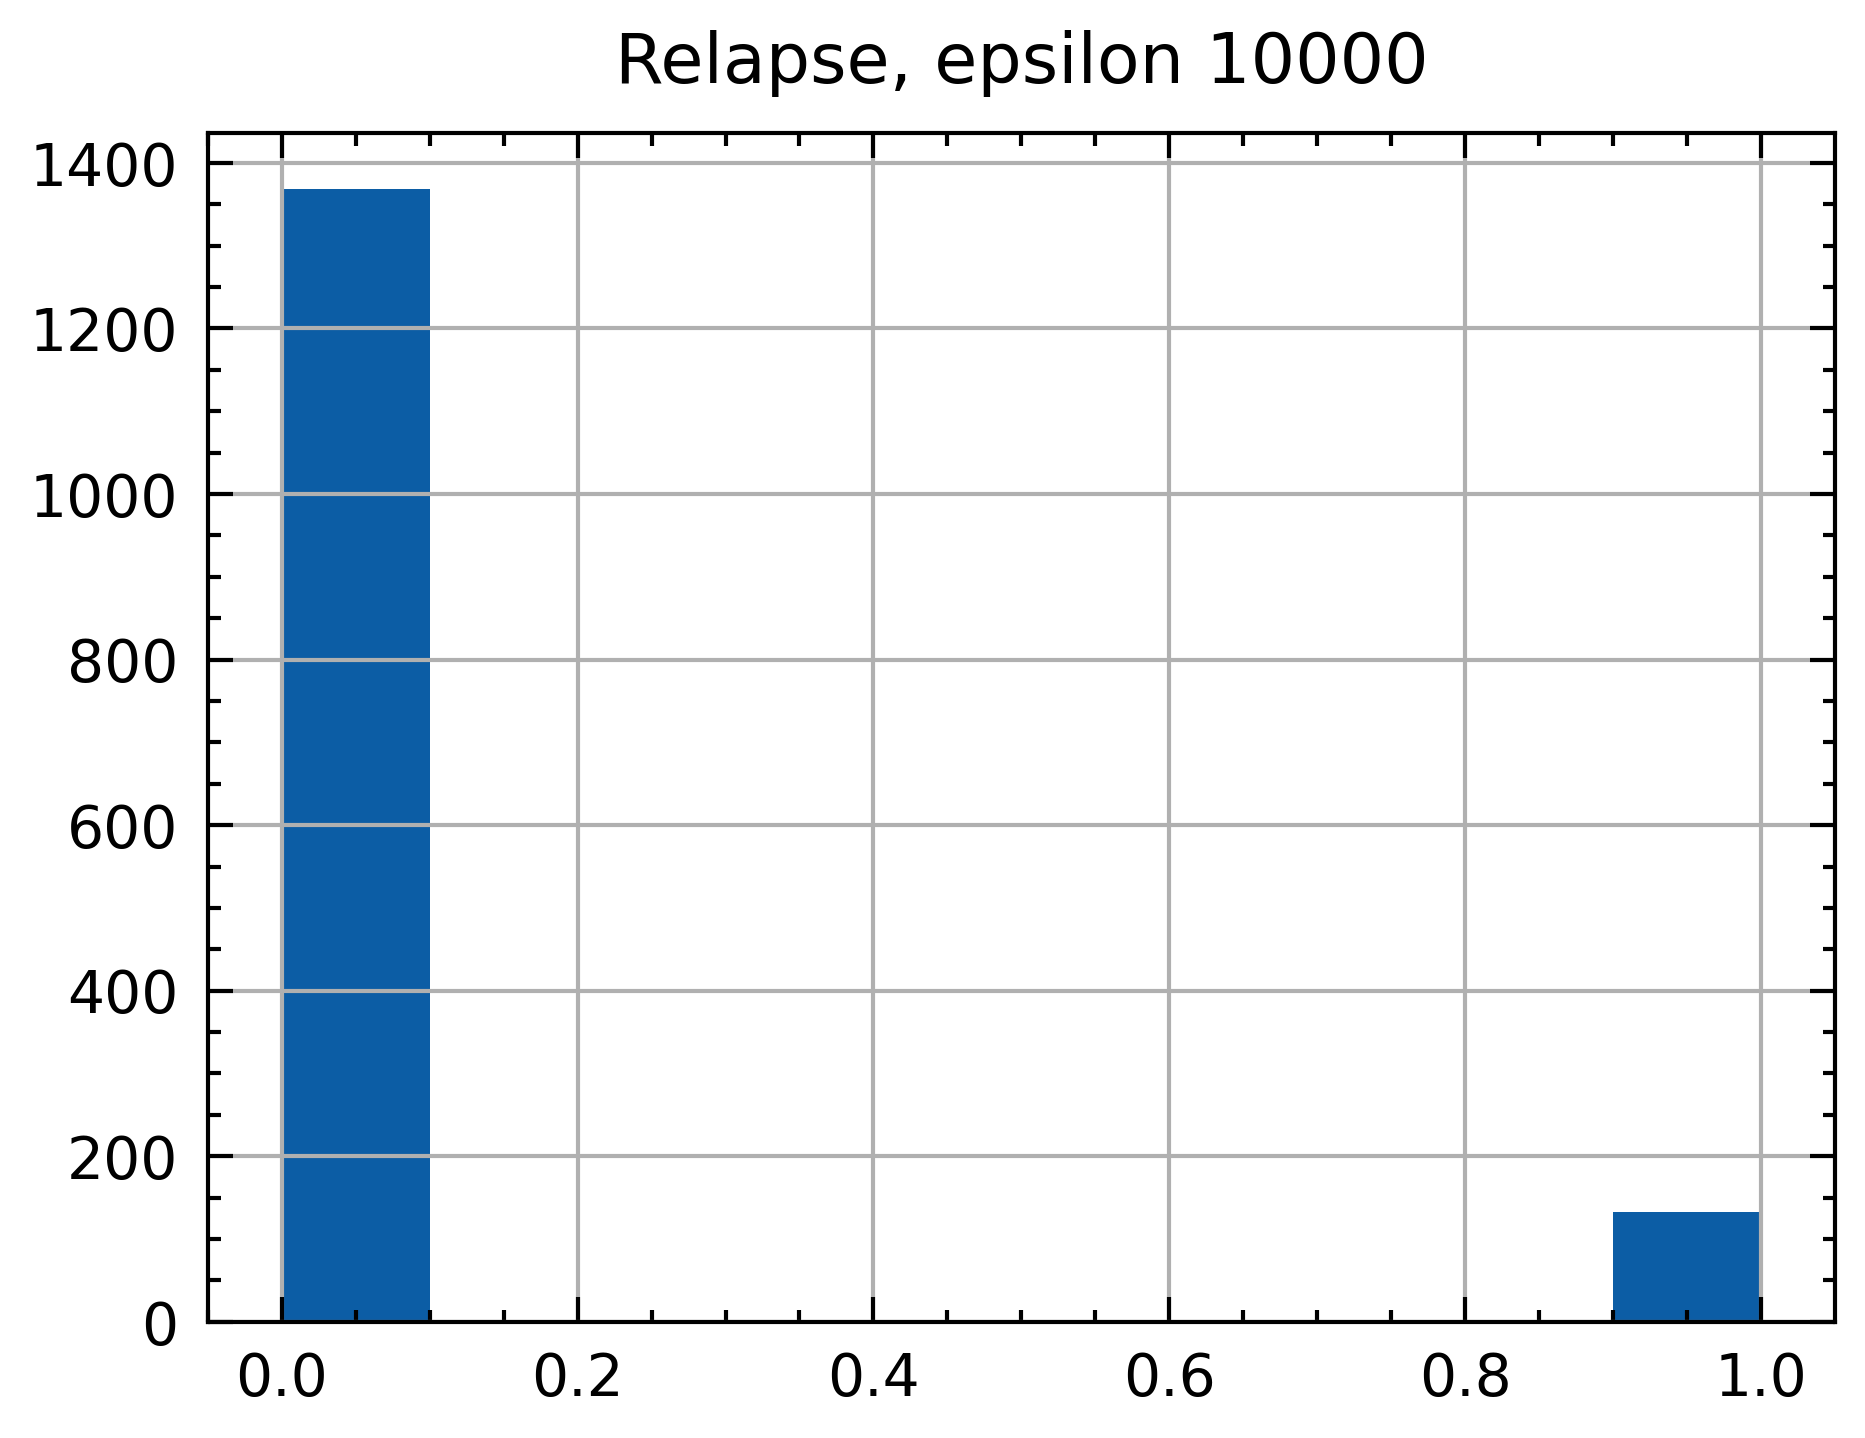

In [21]:
plt.style.use(['science','no-latex'])
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7})          # specify font size here

plt.figure()
real['DEAD'].hist()
plt.title('Relapse, epsilon 10000')

KeyError: 'DG_RCNF_RLPS'

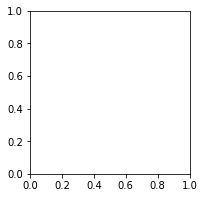

In [12]:
plt.figure(figsize=(20,3))

plt.subplot(1,6,1)
syn_data[0]['DG_RCNF_RLPS'].hist()
plt.title('Relapse, epsilon 0.1')

plt.subplot(1,6,2)
syn_data[1]['DG_RCNF_RLPS'].hist()
plt.title('Relapse, epsilon 1')

plt.subplot(1,6,3)
syn_data[2]['DG_RCNF_RLPS'].hist()
plt.title('Relapse, epsilon 10')

plt.subplot(1,6,4)
syn_data[3]['DG_RCNF_RLPS'].hist()
plt.title('Relapse, epsilon 1000')

plt.subplot(1,6,5)
syn_data[5]['DG_RCNF_RLPS'].hist()
plt.title('Relapse, epsilon 10000')

plt.subplot(1,6,6)
real['DG_RCNF_RLPS'].hist()
plt.title('Relapse, real')

Text(0.5, 1.0, 'DEAD Real')

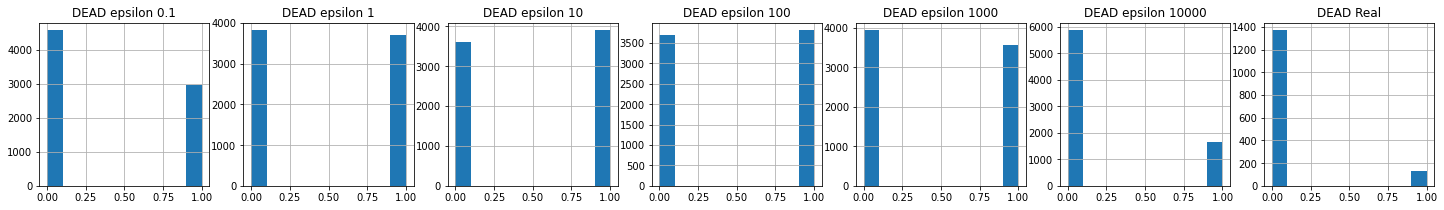

In [5]:
epsilons = [0.1,1,10,100,1000,10000]
plt.figure(figsize=(25,3))
col = 'DEAD'
for i in range(6):
    plt.subplot(1,7,i+1)
    syn_data[i][col].hist()
    plt.title(str(col)+' epsilon ' + str(epsilons[i]))
    
plt.subplot(1,7,7)
real[col].hist()
plt.title(str(col) + ' Real')

<AxesSubplot:>

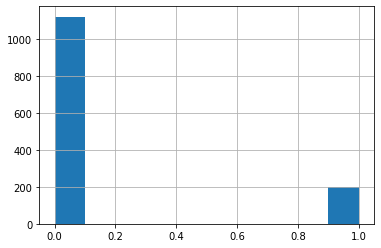

In [26]:


new_d0_dt = ml_train(real, DecisionTreeClassifier(), 1, save = False, over_sampling=False ,importance = False)
new_d0_rf = ml_train(real, RandomForestClassifier(), 1, save = False, over_sampling=False, importance = False)
new_d0_knn = ml_train(real, KNeighborsClassifier(), 1, save = False,  over_sampling=False, importance = False)


#real = real.iloc[:,:35]
#whole data

pd.DataFrame([new_d0_dt[1],new_d0_rf[1],new_d0_knn[1]],columns = ['F1','Acc','ROC','Loss'], 
             index = ['DecisionTree','RandomForest','KNN'])



,F1,Acc,ROC,Loss
DecisionTree,0.6430,0.8761,0.6599,128.9448
RandomForest,0.6528,0.9194,0.6205,15.7358
KNN,0.6386,0.9167,0.6127,71.8293


In [26]:
real['DEAD.1']

0       0
1       1
2       0
3       0
4       0
       ..
1496    0
1497    0
1498    0
1499    0
1500    0
Name: DEAD.1, Length: 1501, dtype: int64

,OVR_SURVIVE,FRST_RLPS_TIME_DIFF,DG_RCNF_RLPS,OPRT_NFRM_OPRT_CLCN_OPRT_KIND_CD,OPRT_NFRM_OPRT_CURA_RSCT_CD,PTH_BPSY_BPTH_BPSY_RSLT_CONT,PTH_BPSY_BPTH_CELL_DIFF_NM,PTH_MLCR_MLPT_BRME_RSLT_NM,PTH_MLCR_MLPT_KE2E_RSLT_NM,PTH_MLCR_MLPT_KRES_RSLT_NM,...,TRTM_CASB_CSTR_PRPS_NM_3,TRTM_CASB_CSTR_NT_3,TRTM_CASB_CSTR_TIME_DELTA3,TRTM_CASB_CSTR_REGN_CD_4,TRTM_CASB_CSTR_PRPS_NM_4,TRTM_CASB_CSTR_NT_4,TRTM_CASB_CSTR_TIME_DELTA4,TRTM_CASB_CSTR_REGN_CD_5,TRTM_CASB_CSTR_NT_5,TRTM_CASB_CSTR_TIME_DELTA5
0,183.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
1,1795.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
2,2276.0,0.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
3,1524.0,0.0,0.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
4,484.0,0.0,0.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,783.0,0.0,0.0,11.0,2.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
6596,881.0,706.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
6597,1714.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0
6598,482.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0,0


In [15]:
pd.read_csv('/home/dogu86/colon_synthesis_2/synthetic/S0_1.csv')

,Unnamed: 0,PT_SBST_NO,OVR_SURVIVE,FRST_RLPS_TIME_DIFF,DG_RCNF_RLPS,OPRT_NFRM_OPRT_CLCN_OPRT_KIND_CD,OPRT_NFRM_OPRT_CURA_RSCT_CD,PTH_BPSY_BPTH_BPSY_RSLT_CONT,PTH_BPSY_BPTH_CELL_DIFF_NM,PTH_MLCR_MLPT_BRME_RSLT_NM,...,TRTM_CASB_CSTR_PRPS_NM_3,TRTM_CASB_CSTR_NT_3,TRTM_CASB_CSTR_TIME_DELTA3,TRTM_CASB_CSTR_REGN_CD_4,TRTM_CASB_CSTR_PRPS_NM_4,TRTM_CASB_CSTR_NT_4,TRTM_CASB_CSTR_TIME_DELTA4,TRTM_CASB_CSTR_REGN_CD_5,TRTM_CASB_CSTR_NT_5,TRTM_CASB_CSTR_TIME_DELTA5
0,0,0,3438.0,400.0,1.0,1.0,2.0,0.0,3.0,1.0,...,1.0,1,1771.0,9.0,0.0,21,296.0,0.0,4,0
1,1,1,529.0,556.0,0.0,0.0,2.0,1.0,2.0,1.0,...,0.0,68,522.0,9.0,0.0,30,815.0,6.0,16,88
2,2,2,2276.0,652.0,0.0,1.0,2.0,0.0,0.0,0.0,...,1.0,3,50.0,6.0,0.0,23,642.0,0.0,86,164
3,3,3,619.0,1683.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1.0,35,350.0,0.0,0.0,21,367.0,0.0,86,88
4,4,4,1569.0,1746.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0.0,22,465.0,10.0,2.0,12,255.0,5.0,28,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,6595,6595,2772.0,1094.0,1.0,1.0,3.0,1.0,1.0,1.0,...,1.0,72,1053.0,8.0,2.0,8,485.0,6.0,5,164
6596,6596,6596,3594.0,271.0,1.0,0.0,0.0,0.0,2.0,0.0,...,1.0,75,219.0,10.0,2.0,33,447.0,0.0,28,0
6597,6597,6597,449.0,2187.0,1.0,0.0,0.0,1.0,2.0,1.0,...,0.0,13,125.0,6.0,0.0,33,300.0,10.0,32,231
6598,6598,6598,1205.0,689.0,0.0,11.0,3.0,1.0,3.0,1.0,...,0.0,15,1472.0,0.0,0.0,0,623.0,8.0,0,152


In [6]:
syn_data[3]

,BSPT_SEX_CD,BSPT_IDGN_AGE,BSPT_FRST_DIAG_NM,BSPT_STAG_CLSF_CD,BSPT_STAG_VL,RLPS,RLPS DIFF,DEAD,OVR_SURV,BPTH_SITE_CONT,...,REGN_CSTR_REGN_NM_7,REGN_CSTR_PRPS_NT_7,REGN_CASB_CSTR_PRPS_NM_7,REGN_TIME_DIFF_7,REGN_CSTR_CYCL_VL_END_7,REGN_CSTR_REGN_NM_8,REGN_CSTR_PRPS_NT_8,REGN_CASB_CSTR_PRPS_NM_8,REGN_TIME_DIFF_8,REGN_CSTR_CYCL_VL_END_8
0,1.0,5.0,0.0,1.0,-1.0,1.0,13.0,1.0,10.0,33.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,8.0,0.0,3.0,0.0,0.0,23.0,1.0,47.0,28.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,9.0,0.0,3.0,2.0,1.0,34.0,0.0,1.0,32.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,9.0,0.0,0.0,1.0,1.0,47.0,1.0,53.0,8.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,7.0,2.0,0.0,4.0,1.0,21.0,0.0,11.0,23.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,1.0,3.0,0.0,0.0,0.0,1.0,43.0,1.0,44.0,17.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7501,0.0,3.0,2.0,2.0,0.0,1.0,43.0,0.0,28.0,5.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7502,1.0,4.0,0.0,1.0,0.0,0.0,43.0,0.0,44.0,5.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7503,0.0,8.0,2.0,0.0,1.0,1.0,43.0,0.0,2.0,9.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


50
45
40
35
30
25
Done 6/5!


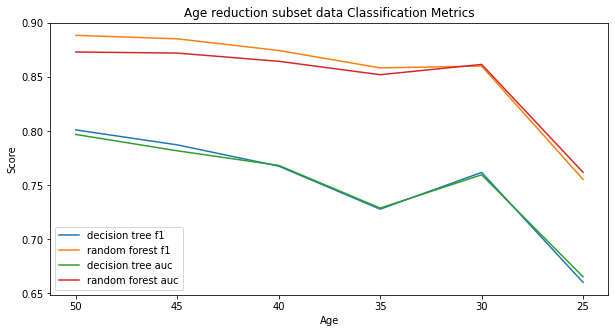

In [4]:
age_cut_comparison(syn_data[5])

In [4]:
age_cut_comparison(real)

50
[0.5442, 0.8291, 0.5268, 49.0323] [0.6291, 0.9222, 0.6068, 13.482]
45
[0.6206, 0.8843, 0.6075, 20.838] [0.645, 0.9079, 0.6156, 7.9822]
40
[0.6678, 0.8777, 0.6829, 34.5602] [0.7182, 0.9113, 0.7022, 3.5732]
35


KeyboardInterrupt: 

In [5]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BSPT_SEX_CD               1501 non-null   int64  
 1   BSPT_IDGN_AGE             1501 non-null   int64  
 2   BSPT_FRST_DIAG_NM         1501 non-null   int64  
 3   BSPT_STAG_CLSF_CD         1501 non-null   int64  
 4   BSPT_STAG_VL              1501 non-null   float64
 5   RLPS                      1501 non-null   int64  
 6   RLPS DIFF                 1501 non-null   float64
 7   DEAD                      1501 non-null   int64  
 8   OVR_SURV                  1501 non-null   float64
 9   BPTH_SITE_CONT            1501 non-null   int64  
 10  BPTH_CELL_DIFF_NM         1501 non-null   int64  
 11  OPRT_CLCN_OPRT_KIND_NM    1501 non-null   int64  
 12  OPRT_CURA_RSCT_NM         1501 non-null   int64  
 13  SGPT_PATL_STAG_VL         1501 non-null   int64  
 14  SGPT_PAT